In [26]:
import os
import pickle
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np

In [5]:
base_path = '/sciclone/geograd/stmorse/reddit/mbkm_50'

In [38]:
years = range(2006, 2021)
months = [f'{mo:02}' for mo in range(1,13)]
yrmo = [(yr, mo) for yr in years for mo in months]

In [9]:
# load cu2d
with open(os.path.join(base_path, f'align/cu2d.npz'), 'rb') as f:
    Cu2d = np.load(f)['Cu2d']
Cu2d.shape

(9000, 2)

In [11]:
with open(os.path.join(base_path, f'align/align_model_HDBSCAN.pkl'), 'rb') as f:
    hdbs = pickle.load(f)
np.amax(hdbs.labels_)

np.int64(977)

In [39]:
C = [] 
Ck = 50 
for year, month in yrmo:
    with open(os.path.join(base_path, f'models/model_cc_{year}-{month}.npz'), 'rb') as f:
        cc = np.load(f)['cc']
        if Ck != cc.shape[0]: print(Ck, cc.shape[0])
        C.append(cc)
C = np.vstack(C)

In [25]:
T = []
for year, month in [(yr, mo) for yr in years for mo in months]:
    with open(os.path.join(base_path, f'tfidf/tfidf_{year}-{month}.pkl'), 'rb') as f:
        tfidf = pickle.load(f)
        # TODO: hacky, maybe 'tfidf' shouldn't be a dict
        for k in range(len(tfidf['tfidf'].keys())):
            T.append(tfidf['tfidf'][k]['keywords'])

In [27]:
cois = np.arange(np.amax(hdbs.labels_))

for coi in cois:
    idx = np.where(hdbs.labels_ == coi)[0]
    
    if len(idx) < 6: 
        continue

    all_words = []
    for x in idx:
        all_words.extend(T[x][:10])
    
    # Count the frequency of each word
    word_counts = Counter(all_words)

    # Find the most common word
    common = word_counts.most_common(3)
    s_common = ' '.join([f'"{word}" ({count})' for word, count in common])

    print(f'{coi}: {s_common}')

1: "無茶しやがって" (2) "ですかね" (2) "でも" (1)
2: "megusta" (7) "ohcrap" (7) "sadtroll" (5)
4: "virus" (8) "covid" (7) "cases" (5)
5: "xd" (2) "264" (2) "81" (2)
6: "sell" (5) "pm" (4) "price" (4)
7: "join" (12) "pm" (9) "send" (7)
9: "00" (3) "beautiful" (2) "gatekeeping" (1)
10: "sent" (8) "messaged" (8) "pm" (7)
11: "en" (8) "de" (8) "ser" (7)
12: "de" (7) "la" (6) "se" (6)
15: "offer" (6) "cert" (4) "crimson" (4)
18: "eu" (9) "pra" (7) "de" (6)
22: "steamcommunity" (4) "pm" (4) "sent" (4)
23: "som" (4) "på" (3) "translate" (3)
24: "de" (10) "eu" (7) "la" (5)
25: "lebron" (8) "team" (8) "nba" (6)
26: "hunter" (10) "psn" (9) "warlock" (8)
27: "de" (5) "eu" (5) "você" (3)
29: "match" (14) "fight" (7) "wwe" (7)
30: "team" (8) "tsm" (5) "lane" (4)
32: "added" (10) "excited" (2) "exchange" (2)
33: "gun" (6) "range" (6) "weapon" (6)
34: "ball" (5) "3rd" (3) "goal" (3)
37: "ign" (6) "added" (6) "31" (5)
40: "messaged" (9) "sent" (4) "message" (3)
43: "pm" (5) "messaged" (5) "sending" (3)
44: "messag

/local/scr/stmorse/TMPDIR/ipykernel_3435178/2426830465.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(Cu2d[idx,0], Cu2d[idx,1], s=30, c=colors[k], alpha=0.6, label=k)


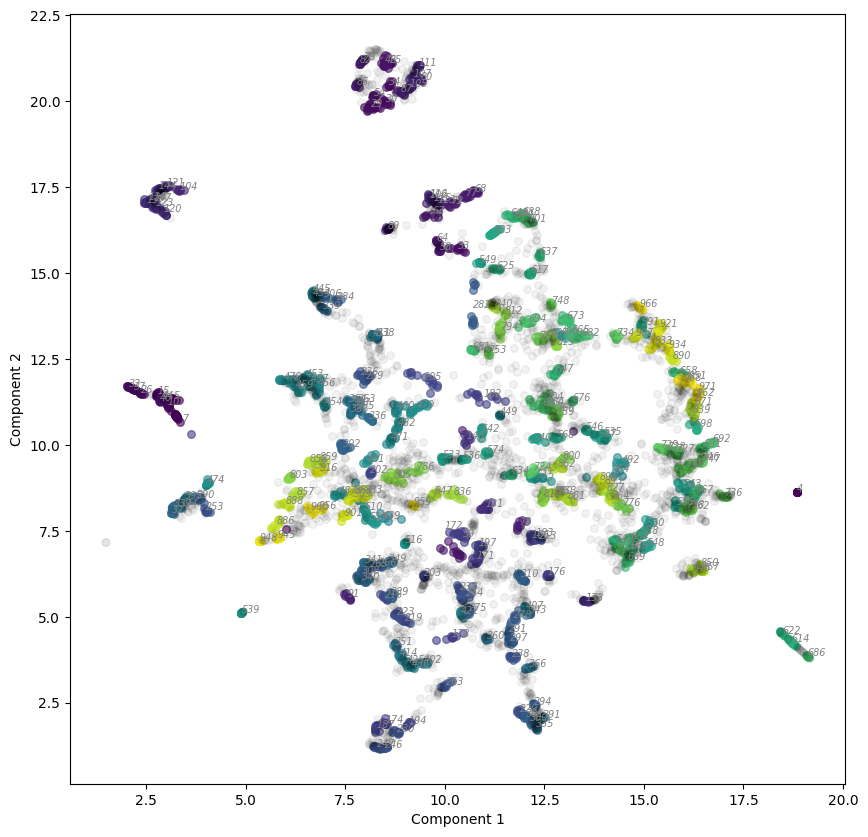

In [37]:
fig, ax = plt.subplots(1,1, figsize=(10,10))

n_clusters = np.amax(hdbs.labels_)
colors = plt.cm.viridis(np.linspace(0, 1, n_clusters))

for k in range(2, n_clusters):
    # NOTE: ignore coi=1 for viz (outlier)
    # if k == 1: continue

    idx = np.where(hdbs.labels_ == k)[0]

    if len(idx) < 8:
        continue

    if np.any(Cu2d[idx,0] < 0) or np.any(Cu2d[idx,1] < 0):
        continue
    
    ax.scatter(Cu2d[idx,0], Cu2d[idx,1], s=30, c=colors[k], alpha=0.6, label=k)

    centroid = np.average(Cu2d[idx,:], axis=0)
    ax.text(centroid[0], centroid[1], k, color='gray', fontsize='x-small', fontstyle='italic')

# plot uncategorized
idx = np.where(hdbs.labels_ == -1)[0]
uncat = Cu2d[idx,:]
uncat = uncat[(uncat[:,0] > 0) & (uncat[:,1] > 0)]
ax.scatter(uncat[:,0], uncat[:,1], s=30, c='k', alpha=0.05)

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')

# ax.set_xlim([0,25])
# ax.set_ylim([0,25])

plt.show()

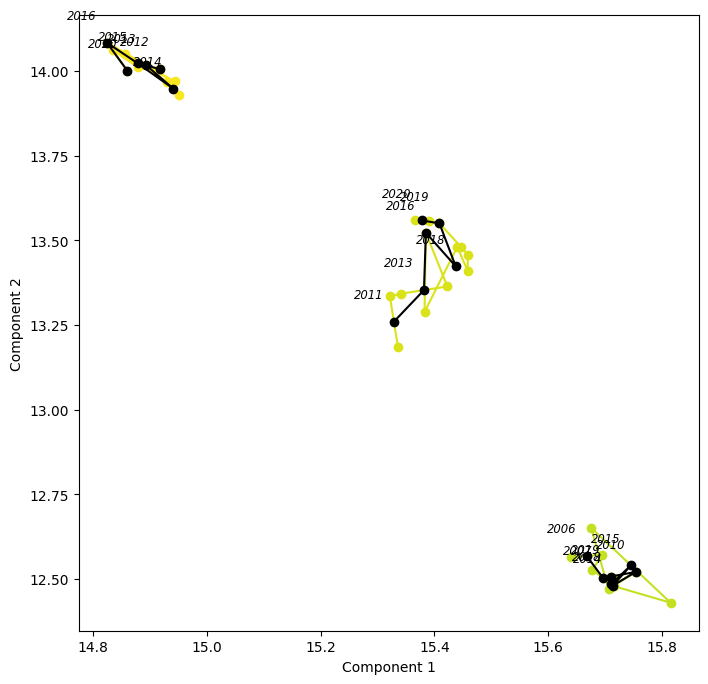

In [22]:
cois = [966, 921, 890, ]
hlabels = [' ', ' ', ' ',]

fig, ax = plt.subplots(1,1, figsize=(8,8))

# use the same colors as full plot
n_clusters = np.amax(hdbs.labels_)
colors = plt.cm.viridis(np.linspace(0, 1, n_clusters))

years = range(2006, 2021)
N = len(years)

for i, coi in enumerate(cois):
    idx = np.where(hdbs.labels_ == coi)[0]

    # ax.scatter(Cu2d[idx,0], Cu2d[idx,1], s=30, c=colors[coi], alpha=0.6, label=k)
    ax.plot(Cu2d[idx,0], Cu2d[idx,1], color=colors[coi], linestyle='-', marker='o')

    if coi in [966, 921, 890]:
        annual_avgs = []
        # for y in [1, N // 2, N-1]:
        for y in range(N):
            # indices split marks
            # NOTE: assumes Ck=50 and 12 non-overlapping month-windows
            split_0, split_1 = 12 * 50 * y, 12 * 50 * (y+1)

            # get just indices in this year
            sub = idx[np.where((idx >= split_0) & (idx < split_1))[0]]

            # if empty, skip
            if len(sub) == 0:
                continue

            # get average position in this year
            avg = np.mean(Cu2d[sub,:], axis=0)
            ax.text(avg[0] - 0.07, avg[1] + 0.07, years[y], fontstyle='italic', fontsize='small')
            annual_avgs.append(avg)
        annual_avgs = np.vstack(annual_avgs)

        ax.plot(annual_avgs[:,0], annual_avgs[:,1], 'ko-')
        
    centroid = np.average(Cu2d[idx,:], axis=0)
    ax.text(centroid[0], centroid[1] - 0.25, hlabels[i])

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')

# ax.set_ylim([8,12])
# ax.set_xlim([11,15])

plt.show()

In [41]:
import pandas as pd

In [46]:
res = []

for coi in np.unique(hdbs.labels_):
    idx = np.where(hdbs.labels_ == coi)[0]
    
    if len(idx) < 10:
        continue

    # Compute the step sizes (normed distances) between consecutive points
    x = C[idx, :]
    steps = x[1:,:] - x[:-1,:]
    stepsizes = np.linalg.norm(steps, axis=1)
    
    # Record the absolute total and average of these step sizes
    total_step_size = np.sum(stepsizes)
    average_step_size = np.mean(stepsizes)
    
    res.append([coi, len(idx), total_step_size, average_step_size])

res = pd.DataFrame(res, columns=['coi', 'size', 'total', 'average'])
res = res[res['coi'] != -1]
res.head()

,coi,size,total,average
1,2,12,1.239091,0.112645
2,7,19,3.191594,0.177311
3,10,11,1.793382,0.179338
4,15,11,1.147273,0.114727
5,24,10,0.877802,0.097534


In [49]:
res.sort_values(by='total', ascending=True).head(10)

,coi,size,total,average
74,445,10,0.355695,0.039522
73,434,13,0.394060,0.032838
43,246,12,0.408850,0.037168
44,247,11,0.429094,0.042909
30,147,13,0.593007,0.049417
93,539,14,0.608848,0.046834
119,701,10,0.626455,0.069606
11,44,11,0.629031,0.062903
23,116,10,0.639331,0.071037
57,335,15,0.652679,0.046620


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
degree = 5
models = [make_pipeline(PolynomialFeatures(degree), LinearRegression()) for _ in range(2)]

ys_pred = np.zeros((N, 2))
for i in range(2):
    models[i].fit(ts_data, ys_data[:,i])
    ys_pred[:,i] = models[i].predict(ts_data)